<a href="https://colab.research.google.com/github/viridis45/Python-data-analysis/blob/master/Initialization_against_vanishing_exploding_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 뉴럴넷에서의 변수 초기화
starting with 10 layers with 500 nodes

1. small random number, avg = 0, stdev = 0.1, gausian

In [0]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


#testing this weight : w = 0.01*np.random.randn(inp, outp)
np.random.seed(0)
D = np.random.randn(1000, 500) #1000x500 2차원 layer를 만들고
hidden_layer_sizes = [500]*10

In [0]:
# 첫 입력계층에서 wx곱하고 해당 노드값이 weight와 곱해져 전달하는 과정을 만듦으로써 weight가 어떻게 변화하는지 확인해보자

Hs = {}

for i in range(len(hidden_layer_sizes)):
  X = D if i == 0 else Hs[i-1]
 # print(X.shape[1])
  fan_in = X.shape[1]
  fan_out = hidden_layer_sizes[i]
  w = np.random.randn(fan_in, fan_out)*0.01
  H = np.dot(X,w)
  H = np.tanh(H)
  Hs[i] = H

  
print( '입력계층 평균 %f and 표준편차 %f' %(np.mean(D), np.std(D)) )

layer_means = [np.mean(H) for i,H in Hs.items()] #
layer_std = [np.std(H) for i,H in Hs.items()]


for i,H in Hs.items():
  print('hidden layer %d average %f and stdev %f' %(i+1, layer_means[i], layer_std[i]))
  
  
# as shown, too many layers kills it
# effective only for smol networks.

입력계층 평균 0.002633 and 표준편차 0.999400
hidden layer 1 average 0.000462 and stdev 0.213176
hidden layer 2 average -0.000005 and stdev 0.047407
hidden layer 3 average -0.000007 and stdev 0.010610
hidden layer 4 average 0.000001 and stdev 0.002370
hidden layer 5 average -0.000000 and stdev 0.000532
hidden layer 6 average -0.000000 and stdev 0.000119
hidden layer 7 average 0.000000 and stdev 0.000027
hidden layer 8 average -0.000000 and stdev 0.000006
hidden layer 9 average -0.000000 and stdev 0.000001
hidden layer 10 average -0.000000 and stdev 0.000000


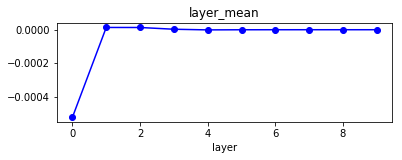

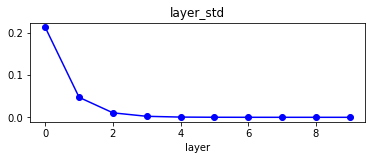

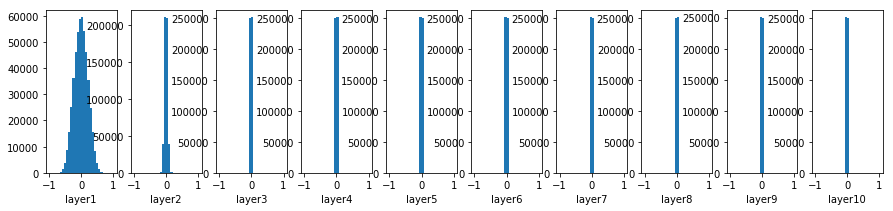

In [0]:
plt.figure()
plt.subplot(211)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.xlabel('layer')
plt.title('layer_mean')

plt.figure()
plt.subplot(212)
plt.plot(Hs.keys(), layer_std, 'ob-')
plt.xlabel('layer')
plt.title('layer_std')

plt.figure(figsize=(15,3))
for i, H in Hs.items():
  plt.subplot(1, len(Hs), i+1)
  plt.hist(H.ravel(), 30, range=(-1,1))
  plt.xlabel('layer'+str(i+1))
plt.show()



## Xavier Initialization [Glorot et al, 2010]

입력계층 평균 0.002633 and 표준편차 0.999400
hidden layer 1 average -0.000401 and stdev 0.626918
hidden layer 2 average 0.000084 and stdev 0.486770
hidden layer 3 average 0.000441 and stdev 0.408986
hidden layer 4 average 0.000064 and stdev 0.357355
hidden layer 5 average 0.000182 and stdev 0.321845
hidden layer 6 average -0.000659 and stdev 0.294276
hidden layer 7 average 0.000043 and stdev 0.271892
hidden layer 8 average -0.000195 and stdev 0.254005
hidden layer 9 average 0.000354 and stdev 0.237914
hidden layer 10 average -0.000143 and stdev 0.225586


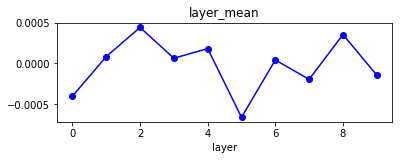

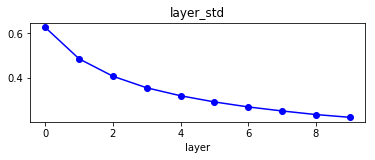

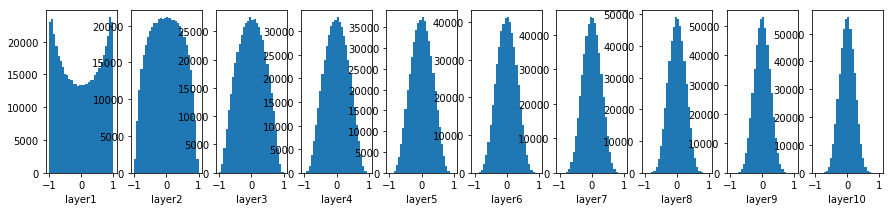

In [0]:
for i in range(len(hidden_layer_sizes)):
  X = D if i == 0 else Hs[i-1]
 # print(X.shape[1])
  fan_in = X.shape[1]
  fan_out = hidden_layer_sizes[i]
  w = np.random.randn(fan_in, fan_out)/np.sqrt(fan_in) ####################altering this buddy only since weight
  H = np.dot(X,w)
  H = np.tanh(H)
  Hs[i] = H
  
  
print( '입력계층 평균 %f and 표준편차 %f' %(np.mean(D), np.std(D)) )

layer_means = [np.mean(H) for i,H in Hs.items()] #
layer_std = [np.std(H) for i,H in Hs.items()]


for i,H in Hs.items():
  print('hidden layer %d average %f and stdev %f' %(i+1, layer_means[i], layer_std[i]))
  
  
  
plt.figure()
plt.subplot(211)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.xlabel('layer')
plt.title('layer_mean')

plt.figure()
plt.subplot(212)
plt.plot(Hs.keys(), layer_std, 'ob-')
plt.xlabel('layer')
plt.title('layer_std')

plt.figure(figsize=(15,3))
for i, H in Hs.items():
  plt.subplot(1, len(Hs), i+1)
  plt.hist(H.ravel(), 30, range=(-1,1))
  plt.xlabel('layer'+str(i+1))
plt.show()



### applying it on a larger dataset

In [0]:
from tensorflow.examples.tutorials.mnist import input_data 
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

W0806 04:26:31.125772 140685694543744 deprecation.py:323] From <ipython-input-50-0c7f7bbf8f0d>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0806 04:26:31.128110 140685694543744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0806 04:26:31.131329 140685694543744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be remove

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0806 04:26:31.826692 140685694543744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0806 04:26:31.831556 140685694543744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0806 04:26:32.180883 140685694543744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
tf.reset_default_graph()

learning_rate = 0.001
training_epochs = 15
batch_size = 100

keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
w1 = tf.get_variable('w1', shape=[784,256], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(x,w1)+b1)
                
w2 = tf.get_variable('w2', shape=[256,256], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1,w2)+b2)
                
w3 = tf.get_variable('w3', shape=[256,10], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hf = tf.nn.relu(tf.matmul(L2,w3)+b3)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hf, labels=y))
train = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [0]:

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = int(mnist.train.num_examples / batch_size)
  for i in range(total_batch):
    batchxs, batchys = mnist.train.next_batch(batch_size)
    myfeed = {x:batchxs, y:batchys}
    cv, _ = sess.run( [cost, train], feed_dict=myfeed)
    avg_cost += cv/total_batch
    
  print('cost:','{:.9f}'.format(avg_cost))
  
c_pre = tf.equal(tf.argmax(hf,1), tf.argmax(y,1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))
print('acc:', sess.run(acc, feed_dict={x:mnist.test.images, y:mnist.test.labels}))


cost: 1.523965202
cost: 1.444389411
cost: 1.425204574
cost: 1.413849445
cost: 1.406109656
cost: 1.401762556
cost: 1.397112741
cost: 1.394119264
cost: 1.392598011
cost: 1.391229284
cost: 1.389465691
cost: 1.391010012
cost: 1.388931809
cost: 1.301762486
cost: 1.174218876
acc: 0.5726


In [0]:
tf.reset_default_graph()

learning_rate = 0.001
training_epochs = 15
batch_size = 100

keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
w1 = tf.get_variable('w1', shape=[784,256], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(x,w1)+b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
                
w2 = tf.get_variable('w2', shape=[256,256], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1,w2)+b2)
L2 = tf.nn.dropout(L1, keep_prob=keep_prob)
                
w3 = tf.get_variable('w3', shape=[256,10], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hf = tf.nn.relu(tf.matmul(L2,w3)+b3)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hf, labels=y))
train = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)




sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = int(mnist.train.num_examples / batch_size)
  for i in range(total_batch):
    batchxs, batchys = mnist.train.next_batch(batch_size)
    myfeed = {x:batchx, y:batchys, keep_prob:0.7}
    cv, _ = sess.run( [cost, train], feed_dict=myfeed)
    avg_cost += cv/total_batch
    
  print('cost:','{:.9f}'.format(avg_cost))
  
c_pre = tf.equal(tf.argmax(hf,1), tf.argmax(y,1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))
print('acc:', sess.run(acc, feed_dict={x:mnist.test.images, y:mnist.test.labels, keep_prob:1}))

### adding layers and nodes

In [0]:
tf.reset_default_graph() #그래프에 있는 모든 텐서를 초기화
x=tf.placeholder(tf.float32, [None,784])
y=tf.placeholder(tf.float32, [None,10])

keep_prob=tf.placeholder(tf.float32)

w1=tf.get_variable("w1", shape=[784,512],initializer=tf.contrib.layers.xavier_initializer())
b1=tf.Variable(tf.random_normal([512]))
L1=tf.nn.relu(tf.matmul(x,w1)+b1)
L1=tf.nn.dropout(L1, keep_prob=keep_prob)

w2=tf.get_variable("w2", shape=[512,512],initializer=tf.contrib.layers.xavier_initializer())
b2=tf.Variable(tf.random_normal([512]))
L2=tf.nn.relu(tf.matmul(L1,w2)+b2)
L2=tf.nn.dropout(L2, keep_prob=keep_prob)


w3=tf.get_variable("w3", shape=[512,512],initializer=tf.contrib.layers.xavier_initializer())
b3=tf.Variable(tf.random_normal([512]))
L3=tf.nn.relu(tf.matmul(L2,w3)+b3)
L3=tf.nn.dropout(L3, keep_prob=keep_prob)


w4=tf.get_variable("w4", shape=[512,512],initializer=tf.contrib.layers.xavier_initializer())
b4=tf.Variable(tf.random_normal([512]))
L4=tf.nn.relu(tf.matmul(L3,w4)+b4)
L4=tf.nn.dropout(L4, keep_prob=keep_prob)


w5=tf.get_variable("w5", shape=[512,10],initializer=tf.contrib.layers.xavier_initializer())
b5=tf.Variable(tf.random_normal([10]))
hf=tf.matmul(L4,w5)+b5

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits
               (logits=hf, labels=y))
train=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batchxs,batchys=mnist.train.next_batch(batch_size)
        myfeed={x:batchxs, y:batchys, keep_prob:0.7}
        cv,_=sess.run([cost, train], feed_dict=myfeed)
        avg_cost+=cv/total_batch
    print('cost:','{:.9f}'.format(avg_cost))

c_pre=tf.equal(tf.argmax(hf, 1), tf.argmax(y,1))
acc=tf.reduce_mean(tf.cast(c_pre, tf.float32))
print('acc:', sess.run(acc, feed_dict=
                       {x:mnist.test.images, 
                        y:mnist.test.labels,
                       keep_prob:1}))


W0806 04:29:41.620149 140685694543744 deprecation.py:506] From <ipython-input-54-72839f2b3ed2>:10: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


cost: 0.471522972
cost: 0.174829402
cost: 0.132343483
cost: 0.109694483
cost: 0.094156396
cost: 0.082459497
cost: 0.074660015
cost: 0.068364204
cost: 0.064643061
cost: 0.056771077
cost: 0.055892879
cost: 0.053227231
cost: 0.050886509
cost: 0.045605055
cost: 0.045556464
acc: 0.9809


## He et al

입력계층 평균 0.002633 and 표준편차 0.999400
hidden layer 1 average 0.001984 and stdev 0.720451
hidden layer 2 average -0.002336 and stdev 0.631621
hidden layer 3 average 0.000044 and stdev 0.593328
hidden layer 4 average -0.000015 and stdev 0.575658
hidden layer 5 average 0.000200 and stdev 0.566828
hidden layer 6 average 0.000324 and stdev 0.560351
hidden layer 7 average 0.000931 and stdev 0.555643
hidden layer 8 average -0.001170 and stdev 0.554673
hidden layer 9 average 0.001653 and stdev 0.556539
hidden layer 10 average -0.000876 and stdev 0.556090


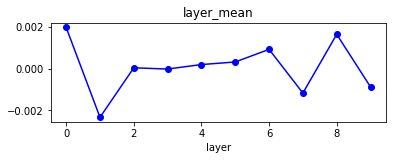

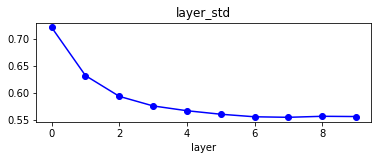

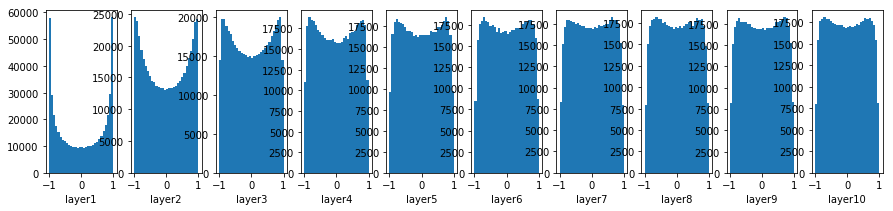

In [0]:
for i in range(len(hidden_layer_sizes)):
  X = D if i == 0 else Hs[i-1]
 # print(X.shape[1])
  fan_in = X.shape[1]
  fan_out = hidden_layer_sizes[i]
  w = np.random.randn(fan_in, fan_out)/np.sqrt(fan_in/2) ####################only added /2 
  H = np.dot(X,w)
  H = np.tanh(H)
  Hs[i] = H
  
  
print( '입력계층 평균 %f and 표준편차 %f' %(np.mean(D), np.std(D)) )

layer_means = [np.mean(H) for i,H in Hs.items()] #
layer_std = [np.std(H) for i,H in Hs.items()]


for i,H in Hs.items():
  print('hidden layer %d average %f and stdev %f' %(i+1, layer_means[i], layer_std[i]))
  
  
  
plt.figure()
plt.subplot(211)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.xlabel('layer')
plt.title('layer_mean')

plt.figure()
plt.subplot(212)
plt.plot(Hs.keys(), layer_std, 'ob-')
plt.xlabel('layer')
plt.title('layer_std')

plt.figure(figsize=(15,3))
for i, H in Hs.items():
  plt.subplot(1, len(Hs), i+1)
  plt.hist(H.ravel(), 30, range=(-1,1))
  plt.xlabel('layer'+str(i+1))
plt.show()




# mnist model based CNN


In [0]:
tf.reset_default_graph()


learning_rate = 0.001
training_epohs=15
batch_size=100

x = tf.placeholder(tf.float32, [None, 28*28])
ximg = tf.reshape(x,[-1, 28, 28, 1]) #image 28x28x1
y = tf.placeholder(tf.float32, [None, 10])

w1 = tf.Variable(tf.random_normal([3,3,1,32])) #3x3x1 filters 32개
L1 = tf.nn.conv2d(ximg, w1, strides=[1,1,1,1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
# L1 이미지 shape -> ?,28,28,1
# conv -> (?,28,28,32)
# pooling -> (?,14,14,32)

#28x28 이미지를 3x3 convolution해서 28x28을 32개 만듬
# 그리고 2x2 풀링






w2 = tf.Variable(tf.random_normal([3,3,32,64])) #3x3x1 filters 32개
L2 = tf.nn.conv2d(L1, w2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
# conv2D? (?,14,14,64)
# relu (?,14,14,64)
# max_pool (?,7,7,64)
L2_flat = tf.reshape(L2, [-1, 7*7*64])
# reshape -> (?, 7*7*64)


w3 = tf.get_variable('w3', shape=[7*7*64, 10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, w3)+b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)





sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batchxs,batchys = mnist.train.next_batch(batch_size)
        myfeed = {x:batchxs, y:batchys}
        cv,_ = sess.run([cost, train], feed_dict=myfeed)
        avg_cost+=cv/total_batch
    print('cost:','{:.9f}'.format(avg_cost))

c_pre=tf.equal(tf.argmax(logits, 1), tf.argmax(y,1))
acc=tf.reduce_mean(tf.cast(c_pre, tf.float32))
print('acc:', sess.run(acc, feed_dict=
                       {x:mnist.test.images, 
                        y:mnist.test.labels
                       }))


cost: 1.038907200
cost: 0.277821656
cost: 0.150061912
cost: 0.110569031
cost: 0.078033307
cost: 0.050205591
cost: 0.043297456
cost: 0.035303812
cost: 0.029946699
cost: 0.025815850
cost: 0.022332749
cost: 0.022793350
cost: 0.014696258
cost: 0.014995147
cost: 0.012589780
acc: 0.9852
